### This notebook does not contain the main methodology we proposed.

- This notebook is designed for an approach called subdomain approach
- We aimed to split data to 4 different dataset (train data = 18 domains, splitting like 5-5-4-4)
- After the splitting, we trained 4 different models with 4 different dataset we created in this notebook
- This approach did not give us any competitive results
- To run this notebook, you need to download the original dataset from: https://zenodo.org/records/5092309 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image, ImageDraw
import os
import shutil

#### Receive Training Data (GWDH 2021)

In [2]:
# Useful Paths
root = r'data(2021)\\gwhd_2021\\'
current_path = os.getcwd()
image_path_relative = "\\data(2021)\\gwhd_2021\\images"

# Loading training dataset
data = pd.read_csv(root + 'competition_train.csv')
# Creating column 'path' to store file path
data['path'] = data.apply(lambda row : root + r'images\\' + row.image_name, axis = 1)

In [3]:
data.head()

,image_name,BoxesString,domain,path
0,4563856cc6d75c670eafd86d5eb7245fbe8f273c28f9e3...,99 692 160 764;641 27 697 115;935 978 1012 102...,Arvalis_1,data(2021)\\gwhd_2021\\images\\4563856cc6d75c6...
1,a2a15938845d9812de03bd44799c4b1bf856a8ad11752e...,230 143 321 222;928 929 1015 1004;485 557 604 ...,Arvalis_1,data(2021)\\gwhd_2021\\images\\a2a15938845d981...
2,401f89a2bb6ab63e3f406bd59b9cadccfe953230feb6cd...,440 239 544 288;333 538 429 594;913 171 963 20...,Arvalis_1,data(2021)\\gwhd_2021\\images\\401f89a2bb6ab63...
3,0a3937653483c36dfb4d957b6f82ae96dbdc7ba36cc3d8...,112 274 188 303;892 812 958 847;0 889 67 928;1...,Arvalis_1,data(2021)\\gwhd_2021\\images\\0a3937653483c36...
4,be1652110a44acd24b42784356e965ce84a04893c3f1bb...,810 204 863 314;360 231 425 408;452 348 510 47...,Arvalis_1,data(2021)\\gwhd_2021\\images\\be1652110a44acd...


In [4]:
data.domain.unique()

array(['Arvalis_1', 'Arvalis_2', 'Arvalis_3', 'Arvalis_4', 'Arvalis_5',
       'Arvalis_6', 'Arvalis_7', 'Arvalis_8', 'Arvalis_9', 'Arvalis_10',
       'Arvalis_11', 'Arvalis_12', 'ETHZ_1', 'Inrae_1', 'NMBU_1',
       'NMBU_2', 'Rres_1', 'ULiège-GxABT_1'], dtype=object)

Number of Domains:  18


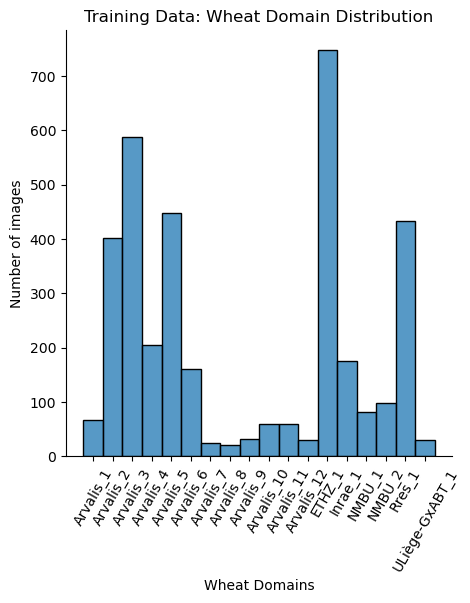

In [5]:
print("Number of Domains: ", len(data["domain"].unique()))
sns.displot(data["domain"], kde=False)
plt.xlabel('Wheat Domains')
plt.ylabel('Number of images')
plt.xticks(rotation=60)
plt.title('Training Data: Wheat Domain Distribution')
plt.show()

##### Manuel Balanced Data Distribution

**First Batch**: [Arvalis 7, Arvalis 8, Arvalis 11, ULiege_1] \
**Second Batch**: [Arvalis 1, Arvalis 9, Arvalis 10, Arvalis 12] \
**Third Batch**: [Arvalis 4, Arvalis 6, Inrae_1, NMBU_1, NMBU_2] \
**Fourth Batch**: [Arvalis 2, Arvalis 3, Arvalis 5, ETHZ_1, Rres_1]

In [6]:
first_batch = ["Arvalis_7", "Arvalis_8", "Arvalis_11", "ULiège-GxABT_1"]
second_batch = ["Arvalis_1","Arvalis_9", "Arvalis_10", "Arvalis_12"]
third_batch = ["Arvalis_4", "Arvalis_6", "Inrae_1", "NMBU_1", "NMBU_2"]
fourth_batch = ["Arvalis_2", "Arvalis_3", "Arvalis_5", "ETHZ_1", "Rres_1"]

In [8]:
def distribute_training_samples2batch(batches, batch_number):
    src_dir = "data(2021)\\gwhd_2021\\train"
    dst_dir = f"data(2021)\\gwhd_2021\\sub_batches\\sub_domain_train_{batch_number}"

    if not os.path.isdir(dst_dir):
        os.makedirs(dst_dir, exist_ok = True)
        os.makedirs(dst_dir+"\\images", exist_ok = True)
        os.makedirs(dst_dir+"\\labels", exist_ok = True)

    for domain_type in batches:
        image_names = list(data[data["domain"] == domain_type]["image_name"])
        for image_name in image_names:
            label_name = image_name.split(".")[0] + ".txt"
            src_img_dir = src_dir + "\\images\\" + image_name
            dst_img_dir = dst_dir + "\\images\\" + image_name
            src_label_dir = src_dir + "\\labels\\" + label_name
            dst_label_dir = dst_dir + "\\labels\\" + label_name

            try:
                shutil.copy(src_img_dir, dst_img_dir)
                shutil.copy(src_label_dir, dst_label_dir)
                #print("File copied successfully.")
 
            # If source and destination are same
            except shutil.SameFileError:
                print("Source and destination represents the same file.")
            
            # If there is any permission issue
            except PermissionError:
                print("Permission denied.")
            
            # For other errors
            except:
                print("Error occurred while copying file.")


In [9]:
distribute_training_samples2batch(first_batch, batch_number=0)
distribute_training_samples2batch(second_batch, batch_number=1)
distribute_training_samples2batch(third_batch, batch_number=2)
distribute_training_samples2batch(fourth_batch, batch_number=3)

Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while copying file.
Error occurred while

### 50 Errors occured because 50 images does not have any label! It is normal situation.